In [1]:
import pandas as pd

df = pd.read_csv('marketing_campaign.csv', sep=';')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
print(f"Total complaints: {sum(df['Complain'] == 1)}")

Total complaints: 21


In [3]:
# Finding avg age of active users (assuming birthday haven't happened yet)

mnt_columns = [col for col in df.columns if col.startswith('Mnt')]
df_age = df[['Year_Birth'] + mnt_columns]
df_age_active = df_age[(df[mnt_columns]>0).any(axis=1)]
avg_age = (2023 - df_age_active['Year_Birth']).mean()

avg_age # Same for nonactive users because df_age[(df[mnt_columns]==0).all(axis=1)] yields empty df

54.19419642857143

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df["Age"] = 2023 - df['Year_Birth']

numerical_cats = [
        "Kidhome",
        "Marital_Status",
        "Teenhome",
        "Education", "NumWebPurchases", "NumStorePurchases"]
continuous_cats = ["Age", "Income", "Recency", ]

continuous_x_numerical_cats = [(a, b) for a in numerical_cats for b in continuous_cats]
numerical_cats_pairs = [(a, b) for idx, a in enumerate(numerical_cats) for b in numerical_cats[idx + 1:]]
continuous_cats_pairs = [(a, b) for idx, a in enumerate(continuous_cats) for b in continuous_cats[idx + 1:]]

len(numerical_cats_pairs), len(continuous_x_numerical_cats)

(15, 18)

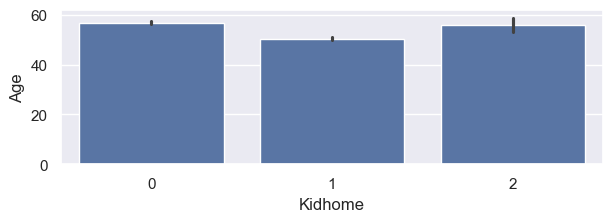

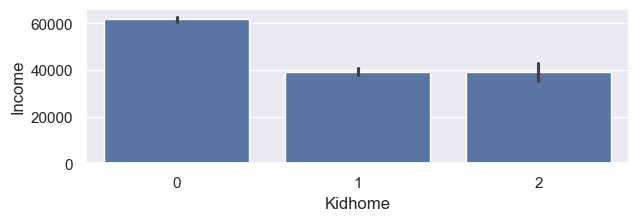

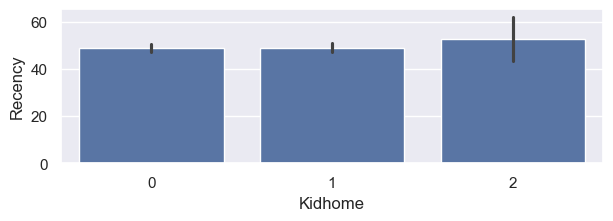

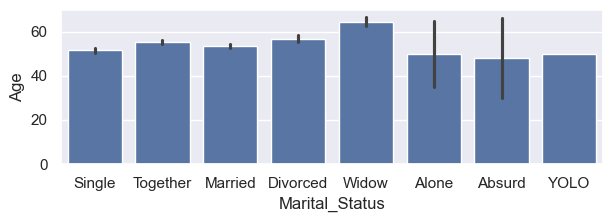

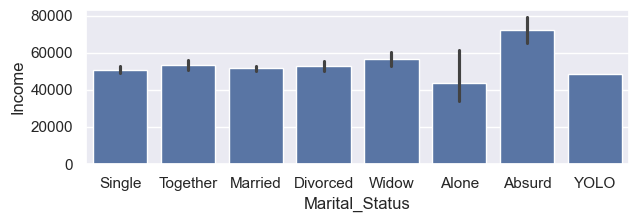

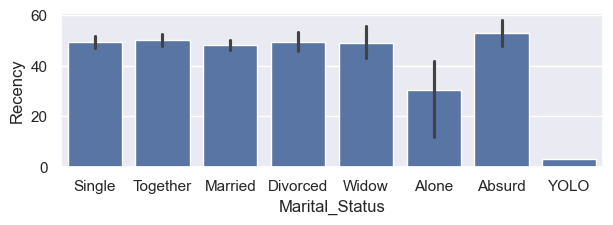

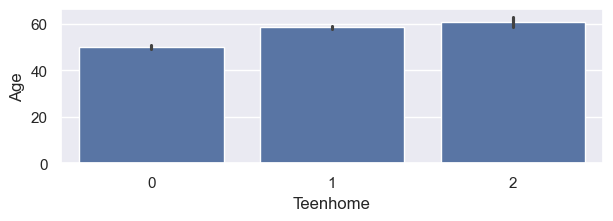

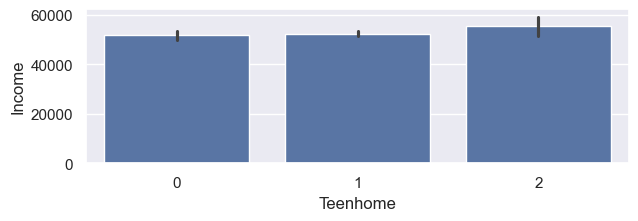

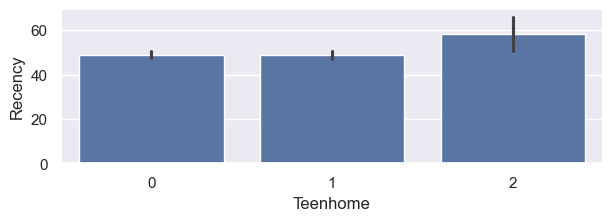

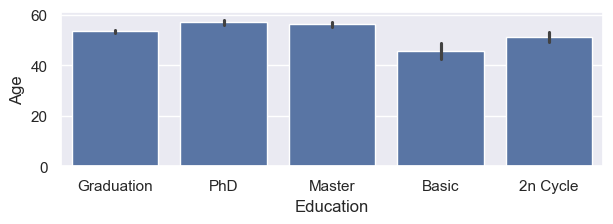

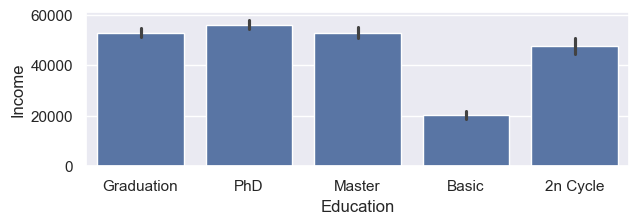

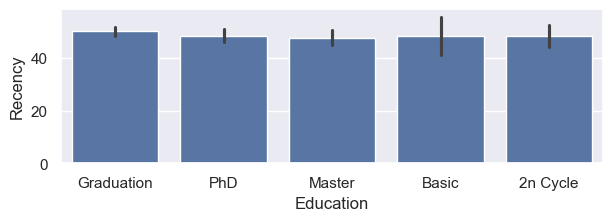

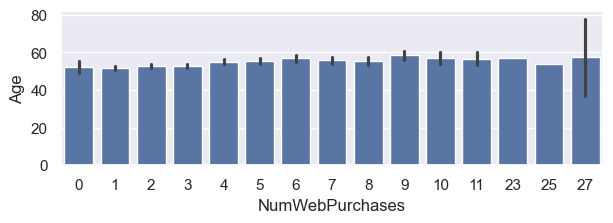

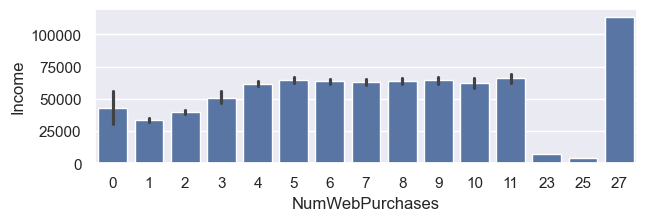

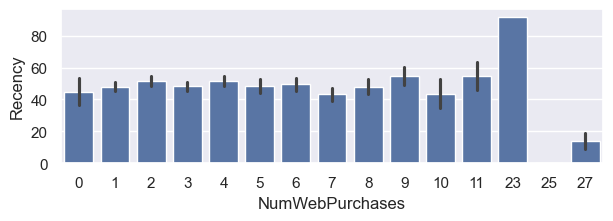

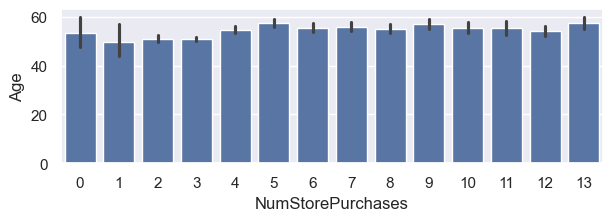

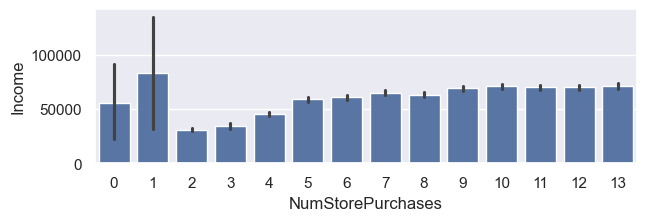

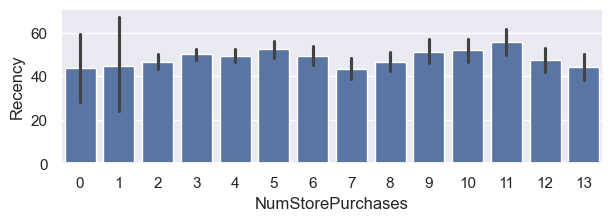

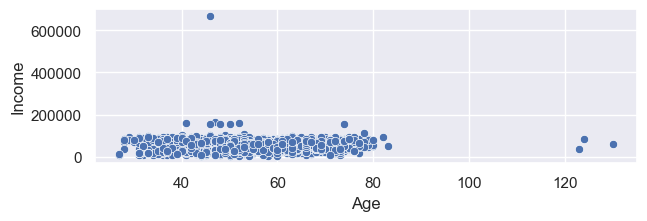

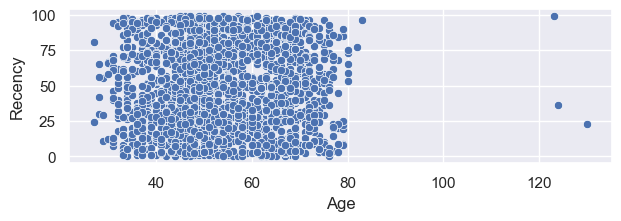

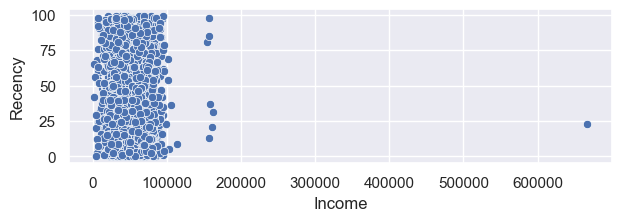

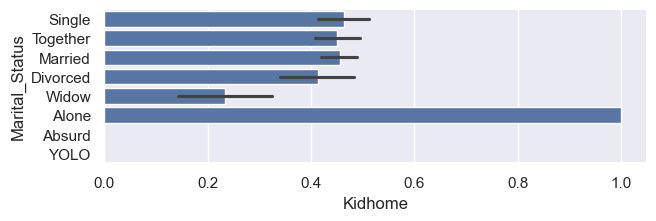

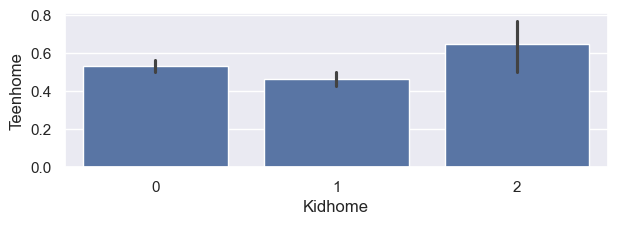

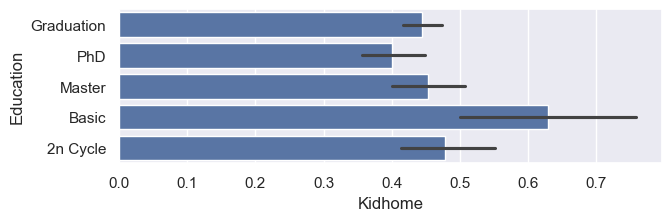

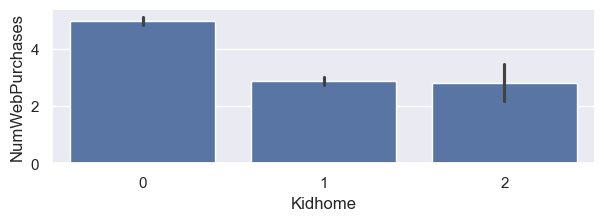

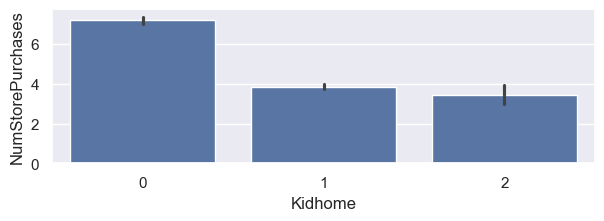

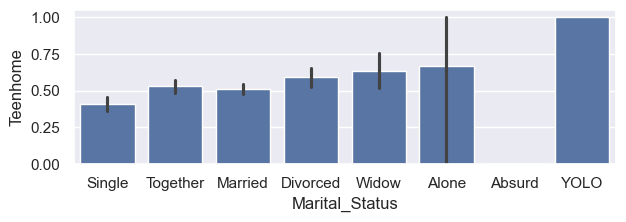

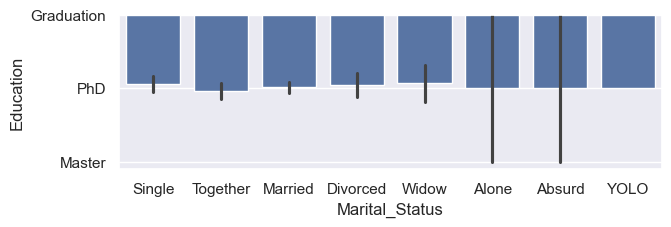

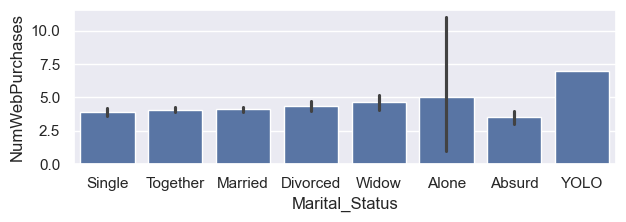

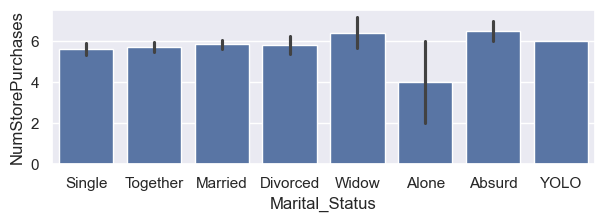

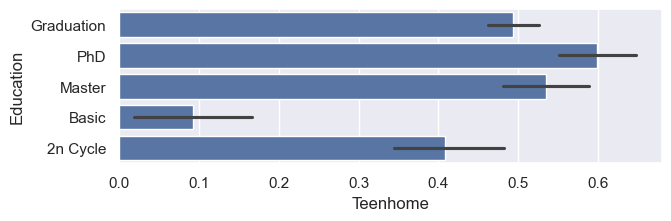

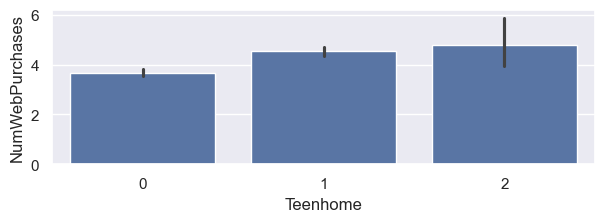

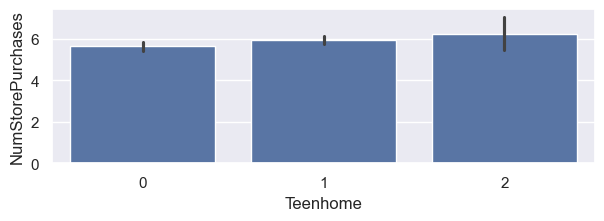

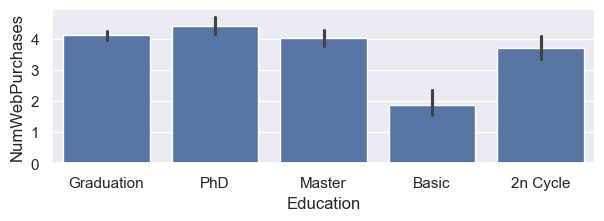

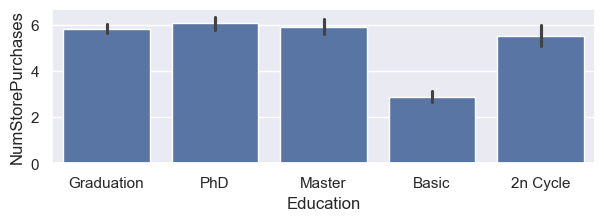

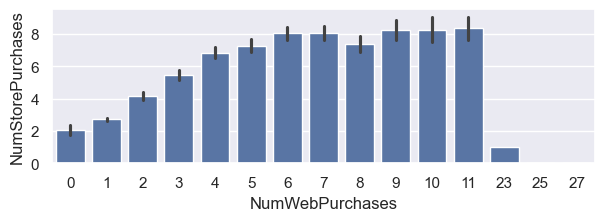

In [6]:
sns.set(rc={'figure.figsize':(7,2)})
    
for pair in continuous_x_numerical_cats:
    sns.barplot(x=pair[0], y=pair[1], data=df)
    plt.show()

for pair in continuous_cats_pairs:
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.show()
    
for pair in numerical_cats_pairs:
    sns.barplot(x=pair[0], y=pair[1], data=df)
    plt.show()

## Вывод:
Как можно заметить, большинство переменных друг с другом никак не связаны, однако всё-равно можно визуально выявить пару закономерностей:

### Корреляции, полезные в маркетинге/бизнесе:
1. Люди с меньшим количеством детей совершают больше покупок.
2. Чем выше доход, тем чаще совершаются покупки, причём как оффлайн, так и онлайн.
3. Количество онлайн покупок у пользователя коррелируют с числом оффлайн покупок.
4. Возраст слабо влияет на количество покупок.

### Общие наблюдения:
1. Возраст не сильно влияет на уровень дохода.
2. Люди с ребёнком дома менее склонны к совершению покупок.
3. Причём при наличии ребёнка количество покупок падает.
4. Люди с меньшим количеством детей в среднем зарабатывают больше.